<a href="https://colab.research.google.com/github/theill95/HFF/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file contains all the code used to do the analysis for the second question of the first assignment. If you wish to run this code locally, make sure to change the directories for the files. The files used will be available at my github at www.github.com/theill95/HFF

The data used is collected using the DataCollector script from my github. The data is 1 month data collected between 01/06/2023 and 01/07/2023 for the EURUSD pair. Minute by minute, and tick by tick data has been collected to analyse potential differences in stylized facts.

The analysis is for each interval of data is done seperately, but interesting facts and constrats are highlighted in the assignment.

# **Minute by minute data analysis**

In [24]:
# load needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
from sklearn.metrics import mean_squared_error
from scipy.stats import norm

In [26]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/EURUSD_1month_1minute.csv', parse_dates=['Timestamp'], dayfirst=True)

# Set index
df.set_index('Timestamp', inplace=True)

# Sort by index
df.sort_index(inplace=True)

print(df.head())

                         Ask      Bid    Volume
Timestamp                                      
2023-06-01 00:00:00  1.06945  1.06935  0.000009
2023-06-01 00:01:00  1.06923  1.06913  0.000009
2023-06-01 00:02:00  1.06927  1.06917  0.000009
2023-06-01 00:03:00  1.06933  1.06923  0.000009
2023-06-01 00:04:00  1.06924  1.06914  0.000009


## **Generating interesting derived variables**

In [27]:
# Calculate Bid-Ask Spread
df['Spread'] = df['Ask'] - df['Bid']

# Calculate Mid-price
df['MidPrice'] = (df['Ask'] + df['Bid']) / 2

# Calculate Price Return
df['PriceReturn'] = df['MidPrice'].pct_change()

# Calculate Log Return
df['LogReturn'] = np.log(df['MidPrice']) - np.log(df['MidPrice'].shift(1))

# Calculate Volatility for different rolling window sizes
for window in [5, 10, 15]:
    df['Volatility_' + str(window)] = df['LogReturn'].rolling(window).std()


## **Simple descriptive statistics**

In [4]:
df.describe()

,Ask,Bid,Volume,Spread,MidPrice,PriceReturn,LogReturn,Volatility_5,Volatility_10,Volatility_15
count,31065.000000,31065.000000,3.106500e+04,3.106500e+04,31065.000000,3.106400e+04,3.106400e+04,31060.000000,31055.000000,31050.000000
mean,1.084046,1.083946,9.204882e-06,1.000000e-04,1.083996,6.512166e-07,6.455047e-07,0.000085,0.000089,0.000090
std,0.009723,0.009723,1.694093e-21,4.891838e-17,0.009723,1.068809e-04,1.068828e-04,0.000065,0.000060,0.000057
min,1.066390,1.066290,9.204882e-06,1.000000e-04,1.066340,-2.580265e-03,-2.583599e-03,0.000000,0.000000,0.000005
25%,1.075370,1.075270,9.204882e-06,1.000000e-04,1.075320,-4.590515e-05,-4.590620e-05,0.000043,0.000050,0.000052
50%,1.086590,1.086490,9.204882e-06,1.000000e-04,1.086540,0.000000e+00,0.000000e+00,0.000069,0.000075,0.000078
75%,1.092440,1.092340,9.204882e-06,1.000000e-04,1.092390,4.638090e-05,4.637982e-05,0.000109,0.000112,0.000113
max,1.101160,1.101060,9.204882e-06,1.000000e-04,1.101110,1.984814e-03,1.982847e-03,0.001205,0.000896,0.000790


**Observations:**

**Ask** and **Bid** are closely related. Both have seen a lot of volatility as seen by differences in their max and min values.

**Volume** is not caputred correctly. Searching around has led me to believe that this is because volume can't be extracted using the cAlgo API for these intervals.

The **Spread** remains constant, and is probally due to the platform having a fixed spread.

The **PriceReturn** and **LogReturn** both have means that is approximately zero, which is a common observation in financial markets due to the random walk behavior of prices. The standard deviation (which can be interpreted as volatility) is very small, indicating relatively stable minute-to-minute changes in prices on average. However, the maximum and minimum values show that there can be substantial moves in either direction.

**Volatility** appears to be increasing as the window size increases from 5 to 15 minutes, given that the mean and standard deviation are increasing. However, the maximum volatility decreases as the window size increases. This might suggest that large price movements tend to be mean-reverting over longer periods.

## **Testing for stationarity and seasonality**

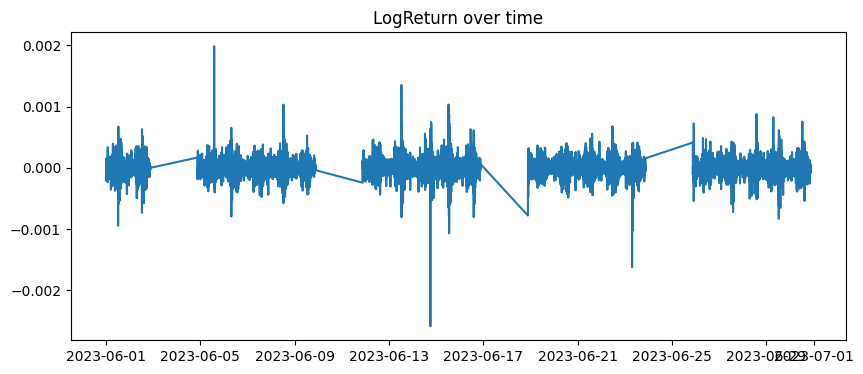

ADF Statistic: -25.631577329477135
p-value: 0.0
Critical Values:
	1%: -3.4305608469958297
	5%: -2.861633188785099
	10%: -2.566819601527009


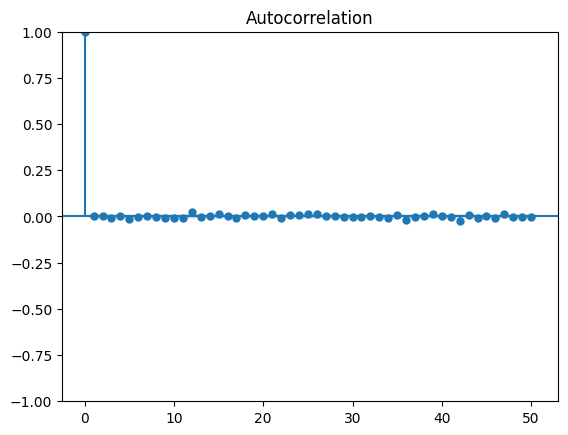

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


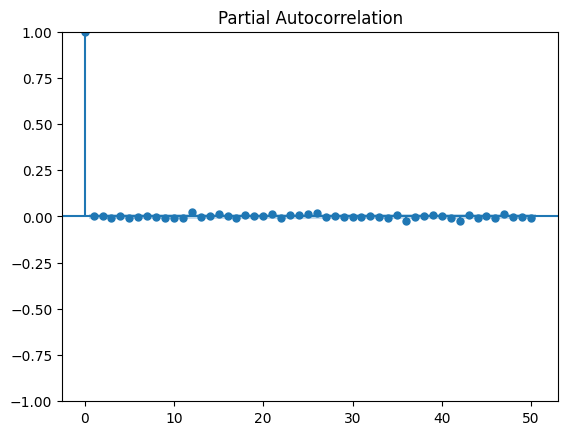

In [6]:
# Setting which variable to do time series analysis on
variable = 'LogReturn'

# Drop NaN values
df = df.dropna(subset=[variable])

# Plotting the chosen variable
plt.figure(figsize=(10,4))
plt.plot(df[variable])
plt.title(f'{variable} over time')
plt.show()

# Performing Augmented Dickey-Fuller test
result = adfuller(df[variable])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# Plotting ACF
plot_acf(df[variable], lags=50)
plt.show()

# Plotting PACF
plot_pacf(df[variable], lags=50)
plt.show()


**Intrepretation of results**

The ADF shows that we can reject the nullhypothesis that there exists an unit root at all relevant significance levels. This means that the proces is **stationary**.

The ACF and PACF graphs indicate that there is no autocorrelation when correcting for the first lags, which is consistent with the data being a **random walk**.

## **Checking the distribution**

<ipython-input-28-535a96cb261d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LogReturn_standardized'] = (df['LogReturn'] - mean) / std


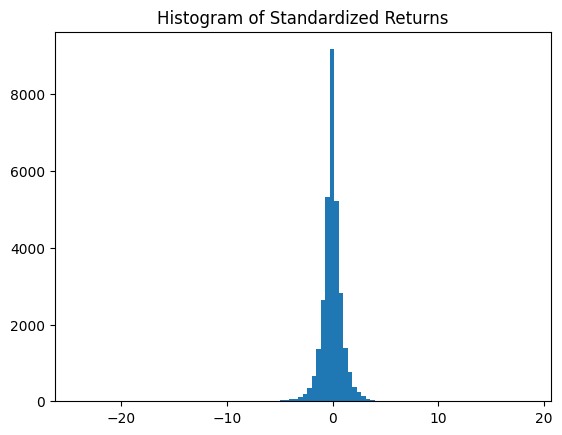

KS statistic: 0.098924641121661
KS p-value: 4.470118109515207e-265


In [28]:
# Drop any NaNs from LogReturn
df = df.dropna(subset=['LogReturn'])

# Compute mean and standard deviation
mean = df['LogReturn'].mean()
std = df['LogReturn'].std()

# Standardize the data
df['LogReturn_standardized'] = (df['LogReturn'] - mean) / std

# Plotting a histogram of standardized returns
plt.hist(df['LogReturn_standardized'], bins=100)
plt.title('Histogram of Standardized Returns')
plt.show()

# Performing a Kolmogorov-Smirnov test against a normal distribution
ks_statistic, ks_p_value = stats.kstest(df['LogReturn_standardized'], 'norm')
print(f"KS statistic: {ks_statistic}")
print(f"KS p-value: {ks_p_value}")


**Intrepretation of results**

The test statistic along with the p-value means that we can reject that the distribution of the LogReturns follows a normal distribution at all relevant significance levels. This means that the data does not show normality, which is often an assumption of many traditional finance models.

## **Checking for leverage effect**

In [10]:
# Correlation between returns and volatility
correlation = df['LogReturn'].corr(df['Volatility_10'])
print(f"Correlation between returns and volatility: {correlation}")

Correlation between returns and volatility: -0.003242358479753604


**Intrepretation**

There appears to be no leverage effect, which is consistent with most litterature on forex markets.

## **Checking for volatility clustering**

In [30]:
# install arch library
!pip install arch
from arch import arch_model
from arch.__future__ import reindexing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 6.3 MB/s eta 0:00:00


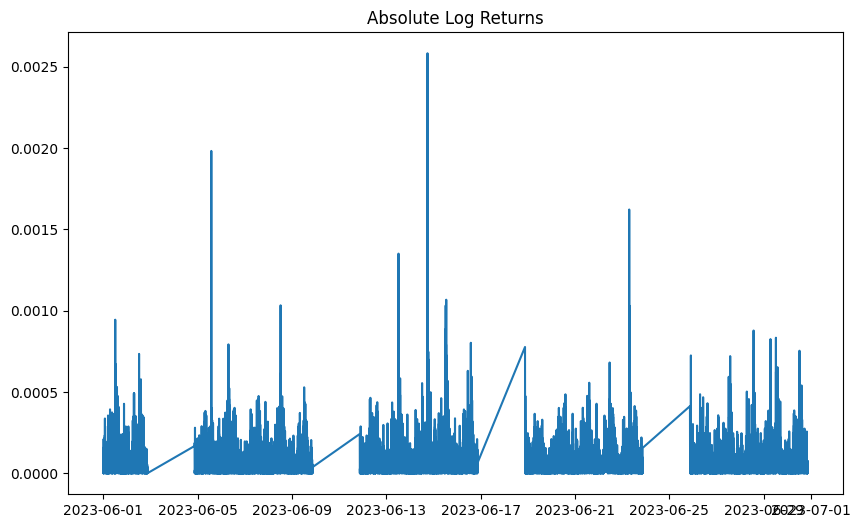

In [21]:
# Calculate the absolute returns
df['AbsoluteLogReturn'] = np.abs(df['LogReturn'])

# Plot the absolute returns
plt.figure(figsize=(10,6))
plt.plot(df.index, df['AbsoluteLogReturn'])
plt.title('Absolute Log Returns')
plt.show()


In [23]:
# Rescale the data to reach convergence (between 1 and 1000)
df_rescaled = df['LogReturn'] * 1e+4

# Specify the GARCH model
am = arch_model(df_rescaled)

# Fit the model
res = am.fit(update_freq=5)

# Perform the ARCH-LM test
print(res.arch_lm_test())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 39962.09269186764
Iteration:     10,   Func. Count:     66,   Neg. LLF: 39509.77146932352
Optimization terminated successfully    (Exit mode 0)
            Current function value: 39470.199017173094
            Iterations: 13
            Function evaluations: 82
            Gradient evaluations: 13
ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 2192.2210
P-value: 0.0000
Distributed: chi2(51)


**Intrepretation**

The P-value of 0.0000 indicates that there are ARCH effects (i.e volatility clustering) at any relevant significance levels. This is also evident from the visualization.

# **Tick by tick data analysis**

In [6]:
# Load data
df2 = pd.read_csv('/content/drive/MyDrive/EURUSD_1month_tick.csv', parse_dates=['Timestamp'], dayfirst=True)

# Set index
df2.set_index('Timestamp', inplace=True)

# Sort by index
df2.sort_index(inplace=True)

print(df2.head())

                             Ask      Bid    Volume
Timestamp                                          
2023-06-01 00:00:01.639  1.06938  1.06935  0.000009
2023-06-01 00:00:01.840  1.06936  1.06935  0.000009
2023-06-01 00:00:03.061  1.06937  1.06935  0.000009
2023-06-01 00:00:04.280  1.06936  1.06934  0.000009
2023-06-01 00:00:05.705  1.06935  1.06934  0.000009


## **Generating interesting derived variables**

In [11]:
# Calculate Bid-Ask Spread
df2['Spread'] = df2['Ask'] - df2['Bid']

# Calculate Mid-price
df2['MidPrice'] = (df2['Ask'] + df2['Bid']) / 2

# Calculate Price Return
df2['PriceReturn'] = df2['MidPrice'].pct_change()

# Calculate Log Return
df2['LogReturn'] = np.log(df2['MidPrice']) - np.log(df2['MidPrice'].shift(1))

# Calculate Volatility for different rolling window sizes
for window in [5, 10, 15]:
    df2['Volatility_' + str(window)] = df2['LogReturn'].rolling(window).std()

## **Simple descriptive statistics**

In [23]:
df2.describe()

,Ask,Bid,Volume,Spread,MidPrice,PriceReturn,LogReturn,Volatility_5,Volatility_10,Volatility_15
count,1.552580e+06,1.552580e+06,1.552580e+06,1.552580e+06,1.552580e+06,1.552579e+06,1.552579e+06,1.552575e+06,1.552570e+06,1.552565e+06
mean,1.084319e+00,1.084299e+00,9.204882e-06,1.987935e-05,1.084309e+00,1.301018e-08,1.290387e-08,1.181359e-05,1.250481e-05,1.278835e-05
std,9.551801e-03,9.552079e-03,4.235166e-20,2.497243e-05,9.551932e-03,1.458171e-05,1.458183e-05,8.311954e-06,7.375006e-06,6.915439e-06
min,1.066190e+00,1.066170e+00,9.204882e-06,0.000000e+00,1.066185e+00,-1.520338e-03,-1.521495e-03,3.201974e-11,6.450089e-11,9.465574e-11
25%,1.075920e+00,1.075900e+00,9.204882e-06,1.000000e-05,1.075905e+00,-4.665768e-06,-4.665779e-06,6.482732e-06,8.093858e-06,8.887387e-06
50%,1.086980e+00,1.086960e+00,9.204882e-06,2.000000e-05,1.086970e+00,0.000000e+00,0.000000e+00,9.892875e-06,1.118962e-05,1.164500e-05
75%,1.092420e+00,1.092400e+00,9.204882e-06,3.000000e-05,1.092410e+00,4.666160e-06,4.666149e-06,1.492549e-05,1.511239e-05,1.511387e-05
max,1.101200e+00,1.101180e+00,9.204882e-06,8.000000e-04,1.101190e+00,9.362375e-04,9.357995e-04,6.919520e-04,5.522652e-04,4.842426e-04


**Intrepretation and comparison**

The results are very similar to the minute by minute data. The main takeaways are the significantly lower volatility and returns, which are obviously because we would not expect prices to vary tick by tick as much as minute by minute (which is sort of an aggregation of the ticks within a minute).

## **Testing for stationarity and seasonality**

Please note that a subset of the dataset is used here containing the first 200.000 observations. This is because of system RAM limitations, which does not allow me to perform the ADF test on 1.5 million observations.

In [12]:
# Generate subset
df2_subset = df2.iloc[:200000]

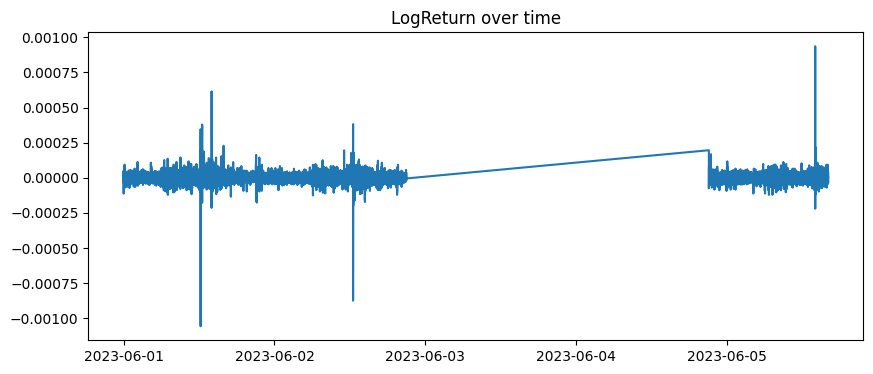

ADF Statistic: -52.29838234916464
p-value: 0.0
Critical Values:
	1%: -3.4303827096765973
	5%: -2.8615544572442215
	10%: -2.5667776950713304


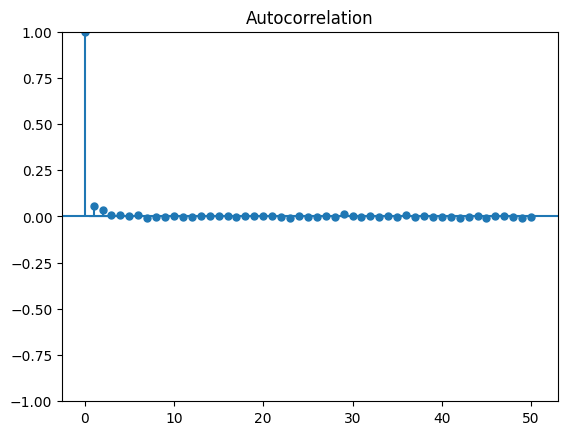

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


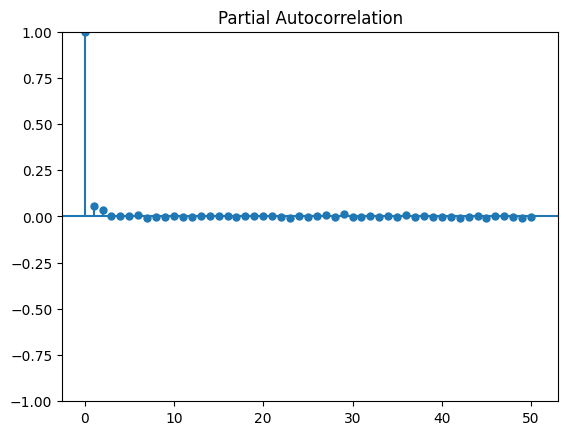

In [5]:
# Setting which variable to do time series analysis on
variable = 'LogReturn'

# Drop NaN values
df2_subset = df2_subset.dropna(subset=[variable])

# Plotting the chosen variable
plt.figure(figsize=(10,4))
plt.plot(df2_subset[variable])
plt.title(f'{variable} over time')
plt.show()

# Performing Augmented Dickey-Fuller test
result = adfuller(df2_subset[variable])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# Plotting ACF
plot_acf(df2_subset[variable], lags=50)
plt.show()

# Plotting PACF
plot_pacf(df2_subset[variable], lags=50)
plt.show()

**Intrepretation and comparison**

As with the minute by minute data, there is strong evidence for stationarity and the data being a random walk.

## **Checking the distribution**


<ipython-input-25-c02c5a401107>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LogReturn_standardized'] = (df2['LogReturn'] - mean) / std


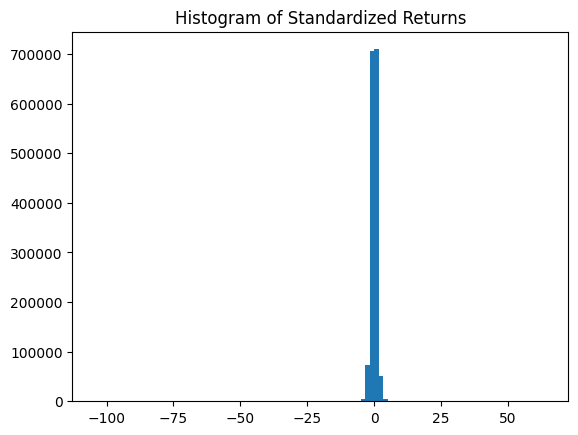

KS statistic: 0.1700200122399347
KS p-value: 0.0


In [25]:
# Drop any NaNs from LogReturn
df2 = df2.dropna(subset=['LogReturn'])

# Compute mean and standard deviation
mean = df2['LogReturn'].mean()
std = df2['LogReturn'].std()

# Standardize the data
df2['LogReturn_standardized'] = (df2['LogReturn'] - mean) / std

# Plotting a histogram of standardized returns
plt.hist(df2['LogReturn_standardized'], bins=100)
plt.title('Histogram of Standardized Returns')
plt.show()

# Performing a Kolmogorov-Smirnov test against a normal distribution
ks_statistic, ks_p_value = stats.kstest(df2['LogReturn_standardized'], 'norm')
print(f"KS statistic: {ks_statistic}")
print(f"KS p-value: {ks_p_value}")

**Intrepretation and comparison**

As with the minute by minute data, we have evidence of the data not being normal distributed. This is even more significant in this case with the tick by tick data.

## **Checking for Leverage effect**

In [29]:
# Correlation between returns and volatility
correlation = df2['LogReturn'].corr(df2['Volatility_10'])
print(f"Correlation between returns and volatility: {correlation}")

Correlation between returns and volatility: -0.006321434933733388


**Intrepretation and comparison**

As with the minute by minute data, we see no correlation between the returns and the volatility. This suggests that the leverage effect is not present in the data.

## **Checking for volatility clustering**

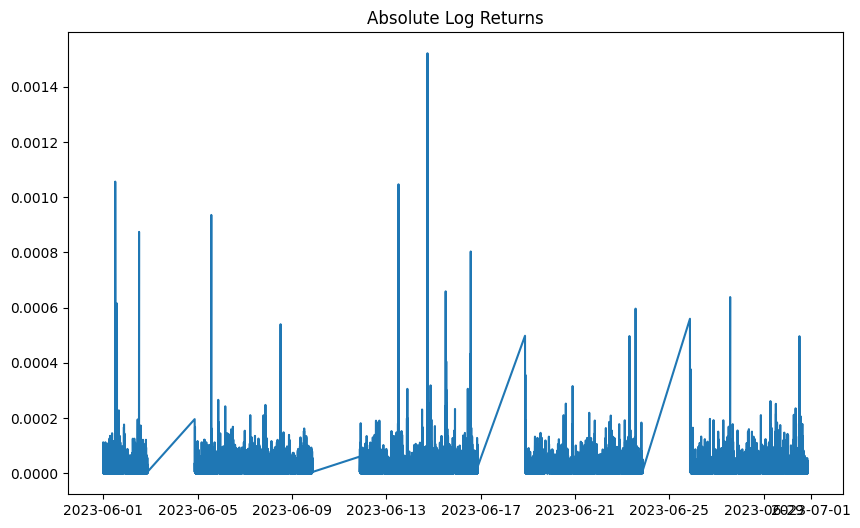

In [32]:
# Calculate the absolute returns
df2['AbsoluteLogReturn'] = np.abs(df2['LogReturn'])

# Plot the absolute returns
plt.figure(figsize=(10,6))
plt.plot(df2.index, df2['AbsoluteLogReturn'])
plt.title('Absolute Log Returns')
plt.show()

In [34]:
# Rescale the data to reach convergence (between 1 and 1000)
df2_subset_rescaled = df2_subset['LogReturn'] * 1e+5

# Specify the GARCH model
am = arch_model(df2_subset_rescaled)

# Fit the model
res = am.fit(update_freq=5)

# Perform the ARCH-LM test
print(res.arch_lm_test())

Iteration:      5,   Func. Count:     39,   Neg. LLF: 179669226787.8735
Iteration:     10,   Func. Count:     78,   Neg. LLF: 375302.1729757898
Iteration:     15,   Func. Count:    113,   Neg. LLF: 815088.4987146183
Iteration:     20,   Func. Count:    144,   Neg. LLF: 351626.1492668897
Iteration:     25,   Func. Count:    171,   Neg. LLF: 350905.1352186041
Optimization terminated successfully    (Exit mode 0)
            Current function value: 350905.1352186041
            Iterations: 29
            Function evaluations: 175
            Gradient evaluations: 26
ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 4351.1381
P-value: 0.0000
Distributed: chi2(81)


**Intrepretation and comparison**

The P-value of 0.0000 indicates that there are ARCH effects (i.e volatility clustering) at any relevant significance levels. This is also evident from the visualization. The test statistic is twice as big as for the minute by minute data which might be evidence of even stronger confidence in the pressence of volatility clustering.